In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [4]:
with open("dh_depth_selected.pkl", "rb") as f:
    dh_depth_selected = pickle.load(f)

with open("dh_index_selected.pkl", "rb") as f:
    dh_index_selected = pickle.load(f)

with open("dh_index_test_data.pkl", "rb") as f:
    dh_index_test_data, index_test_labels = pickle.load(f)

with open("dh_depth_test_data.pkl", "rb") as f:
    dh_depth_test_data, depth_test_labels = pickle.load(f)

In [13]:
dh_depth_selected[0]

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.155239,-0.119571,0.246024,-0.195567,0.058792,-0.386857,0.076317,1.037159,0.221750,0.082933,...,-0.165770,0.938429,1.145010,1.086542,-0.179749,0.913524,-0.321798,1.548086,0.122172,3.0
1,-0.048802,-0.058667,0.113255,-0.150208,0.028011,-0.245231,-0.072998,1.100961,0.224163,0.019276,...,-0.192191,0.942574,1.200568,0.994018,-0.217378,0.830369,-0.264600,1.782542,0.085020,0.0
2,-0.021871,-0.154365,0.111412,-0.138372,0.065412,-0.318030,-0.015892,1.051743,0.257742,0.047839,...,-0.177815,0.951750,1.036025,1.094689,-0.240705,0.968096,-0.202893,1.568927,0.160446,4.0
3,-0.048752,-0.157899,0.223430,-0.171918,0.150768,-0.436764,0.101384,0.927736,0.322241,0.060024,...,-0.203521,0.983672,0.986936,1.019024,-0.207490,0.925645,-0.348373,1.664598,0.109539,6.0
4,-0.054715,-0.042693,0.090729,-0.203390,0.091682,-0.139748,0.031401,1.078012,0.179433,-0.080583,...,-0.177078,1.039181,0.986058,1.015130,-0.174126,0.889230,-0.186620,1.904710,0.307049,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.118583,-0.211520,0.158319,-0.155477,0.035488,-0.295398,0.079601,0.816375,0.286601,0.068923,...,-0.093409,1.061555,0.734825,1.084782,-0.198437,1.013060,-0.222854,1.517715,0.095727,2.0
71,-0.017339,-0.143249,0.092899,-0.121678,0.044230,-0.330473,0.000766,1.040577,0.301449,0.046499,...,-0.161055,0.959352,1.071067,1.108810,-0.205091,0.952662,-0.199814,1.581232,0.152373,4.0
72,0.245444,-0.235475,0.213400,-0.055345,0.104970,-0.248497,0.149976,0.687192,0.336743,0.004602,...,-0.061178,1.067249,0.354582,0.967214,-0.330797,0.966842,-0.234971,1.466030,-0.037517,8.0
73,0.022569,-0.203596,0.137346,-0.133514,0.097339,-0.341101,-0.012523,0.945655,0.271250,-0.003906,...,-0.164946,0.972993,0.857086,1.089414,-0.241761,0.869379,-0.194686,1.538133,0.105790,1.0


{np.float64(0.8538461538461538)}
75


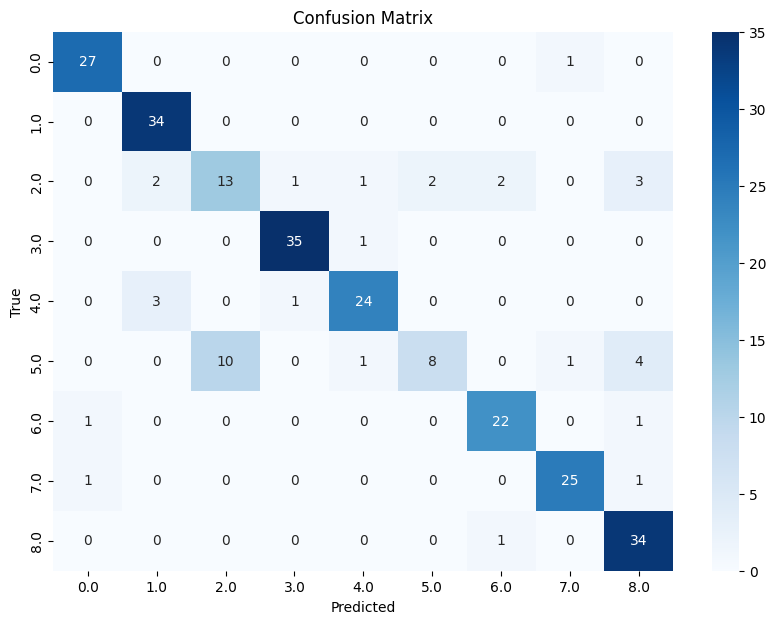

{np.float64(0.85)}
52


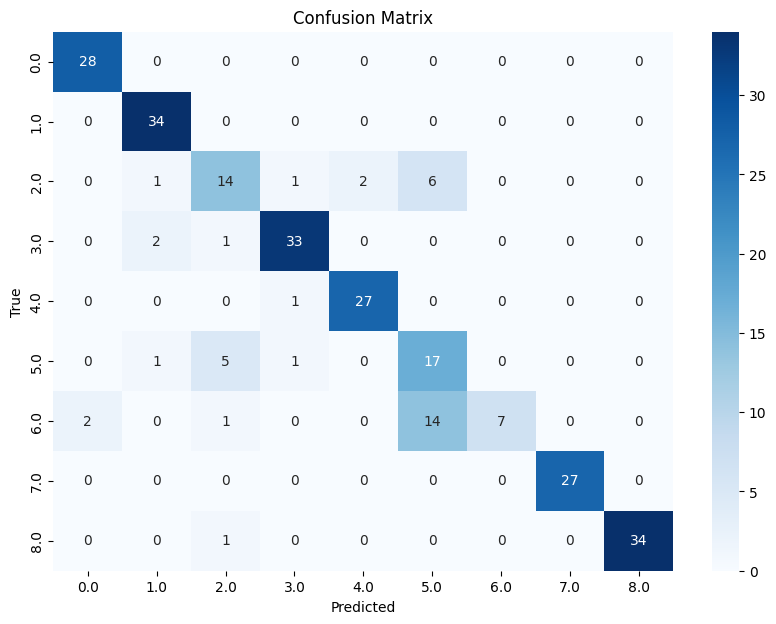

{np.float64(0.8346153846153846)}
50


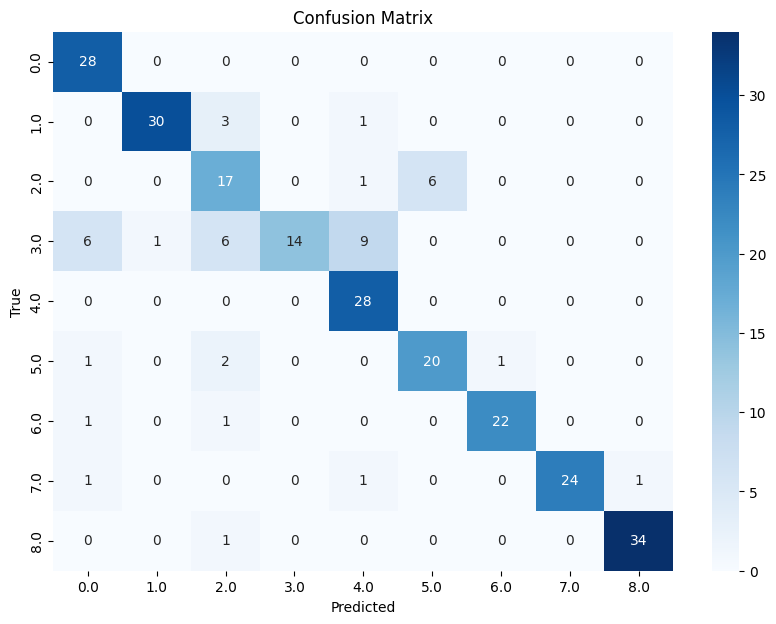

{np.float64(0.8846153846153846)}
90


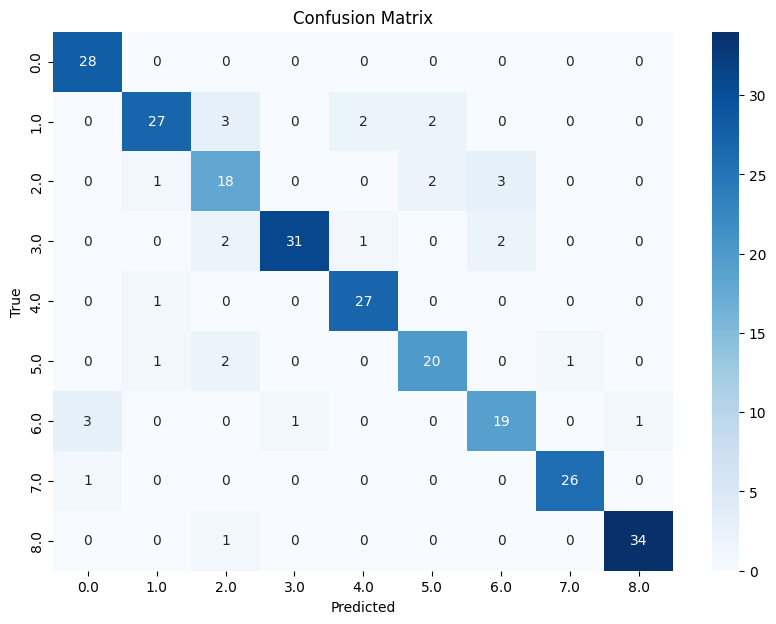

{np.float64(0.8923076923076924)}
78


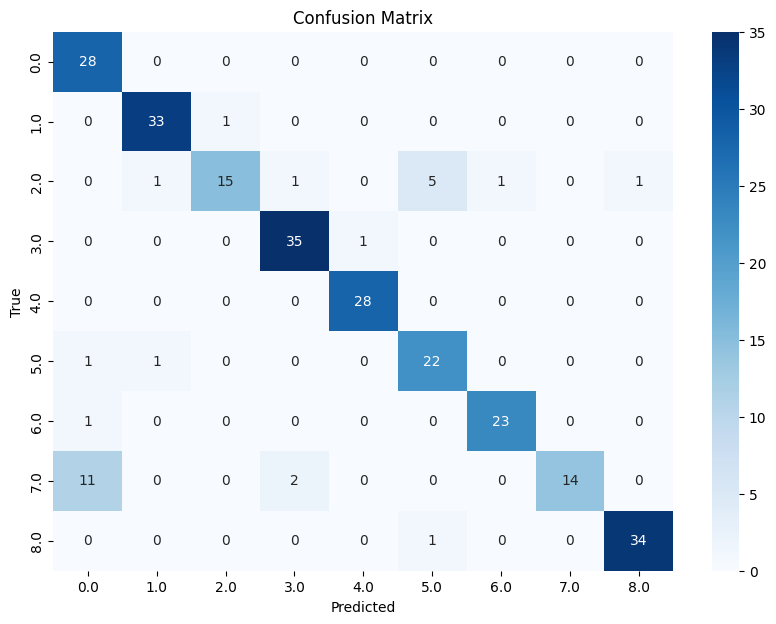

In [15]:
#dh_depth_selected is a list of selected dataframes
#for each one, train a random forest classifier and test on the test data
accs_depth = []
nums_depth = []
for s in dh_depth_selected:
    X_train = s.iloc[:, :-1]
    y_train = s.iloc[:, -1]
    #train a random forest classifier
    rf = RandomForestClassifier(n_estimators=20, max_depth=7, random_state=42)
    rf.fit(X_train, y_train)
    #test on the test data
    y_pred = rf.predict(dh_depth_test_data[:, :-1])
    #print the accuracy
    print({np.mean(y_pred == depth_test_labels)})
    print(len(s))
    accs_depth.append(np.mean(y_pred == depth_test_labels))
    nums_depth.append(len(s))

    #plot confusion matrix
    cm = confusion_matrix(depth_test_labels, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

{np.float64(0.926923076923077)}
130


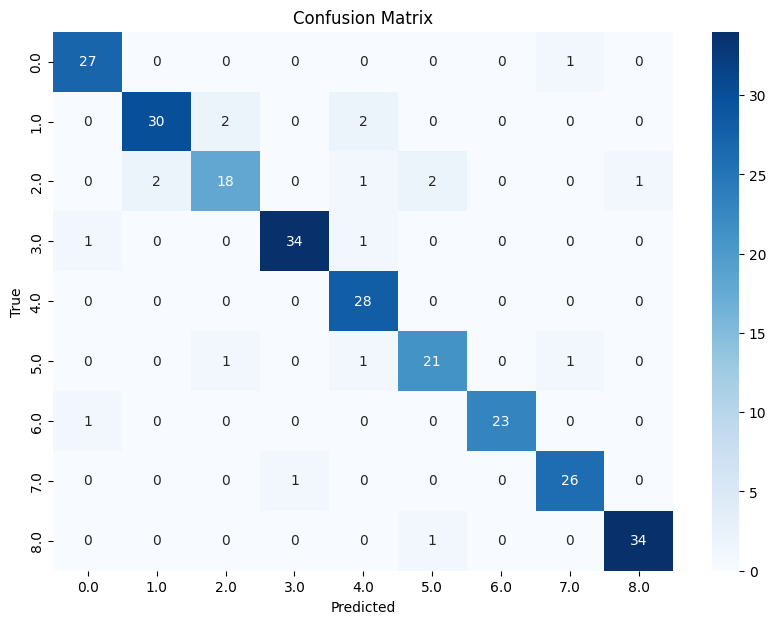

{np.float64(0.9076923076923077)}
170


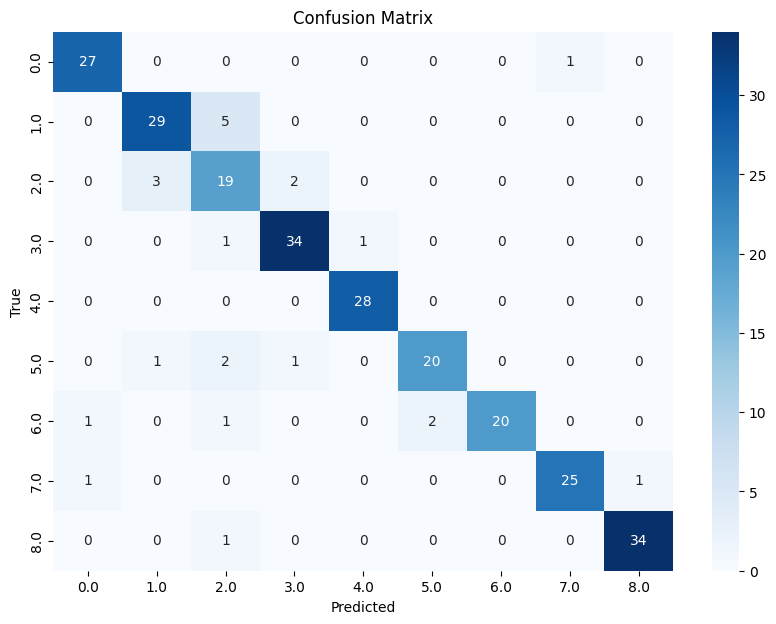

{np.float64(0.9576923076923077)}
130


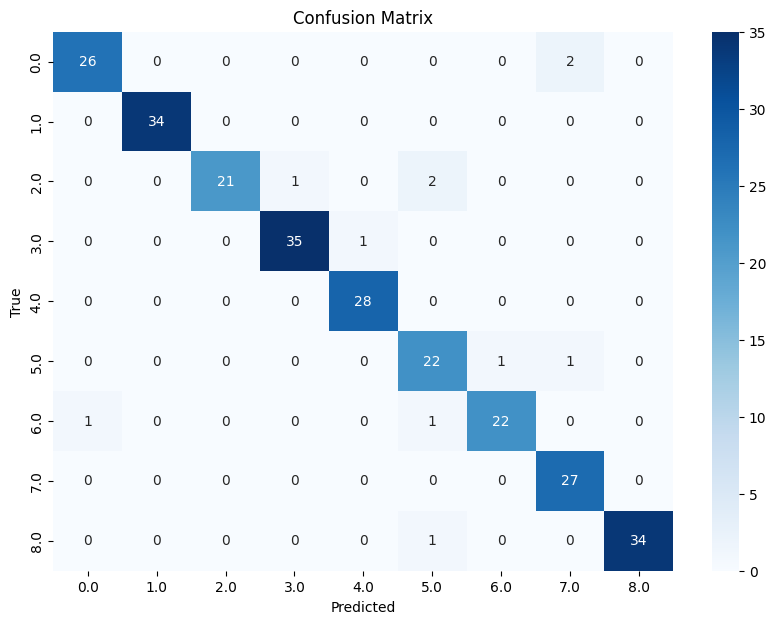

{np.float64(0.7384615384615385)}
50


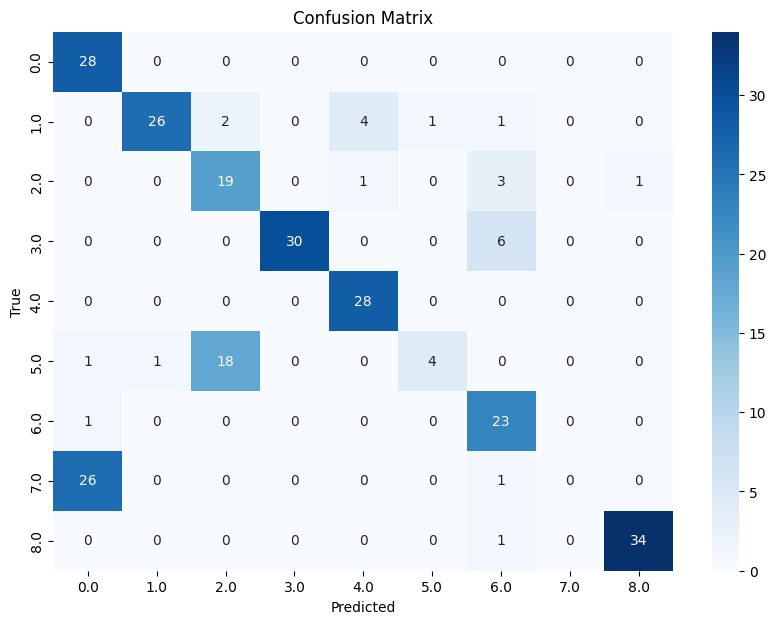

{np.float64(0.8692307692307693)}
110


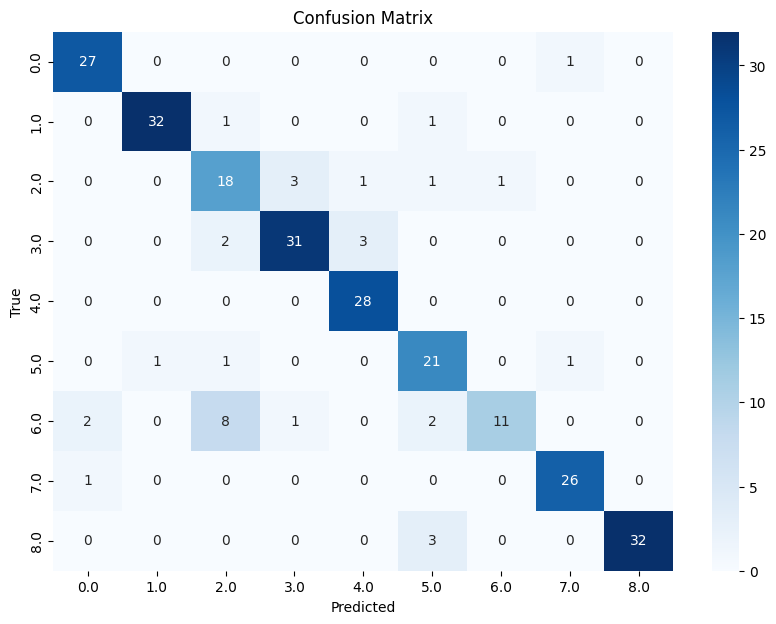

In [16]:
#same as above but for index
accs_index = []
nums_index = []

for s in dh_index_selected:
    X_train = s.iloc[:, :-1]
    y_train = s.iloc[:, -1]
    #train a random forest classifier
    rf = RandomForestClassifier(n_estimators=20, max_depth=7, random_state=42)
    rf.fit(X_train, y_train)
    #test on the test data
    y_pred = rf.predict(dh_index_test_data[:, :-1])
    #print the accuracy
    print({np.mean(y_pred == index_test_labels)})
    print(len(s))
    accs_index.append(np.mean(y_pred == index_test_labels))
    nums_index.append(len(s))

    #plot confusion matrix
    cm = confusion_matrix(index_test_labels, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [17]:
#try offline
#read the data: note there is no header
df = pd.read_csv('/Users/jonathanzhu/Documents/data/vc_mutant_data.csv', header=None)

#rename columns: all are x0, x1, x2, etc. except the last one, which is "Class"
df.columns = ['x' + str(i) for i in range(0, 512)] + ['Class']

#items in the "Class" column are currently strings - convert to integers
items = df['Class'].unique()
corresponding_dict = {items[i]: i for i in range(len(items))}

df['Class'] = df['Class'].map(corresponding_dict)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x503,x504,x505,x506,x507,x508,x509,x510,x511,Class
0,0.052671,-0.170843,0.127665,-0.157065,0.149449,-0.405221,-0.015877,1.019597,0.306551,0.057538,...,1.002674,0.837392,1.133352,-0.255242,0.919627,-0.167685,1.559194,0.124128,0.642259,0
1,0.010678,-0.170641,0.137485,-0.158542,0.166123,-0.352311,0.006440,1.031316,0.309140,-0.023432,...,0.972432,0.887417,1.089113,-0.302200,0.849822,-0.190138,1.495022,0.091063,0.695978,0
2,0.031659,-0.180831,0.093920,-0.172080,0.157711,-0.415934,-0.031329,1.123129,0.252306,0.008820,...,1.016015,0.926723,1.136414,-0.335968,0.847125,-0.204482,1.524836,0.071172,0.737653,0
3,0.075516,-0.196257,0.198255,-0.160592,0.085160,-0.361760,-0.018122,0.951612,0.351116,0.023851,...,0.971781,0.756529,1.104958,-0.238443,0.922150,-0.206724,1.502505,0.139053,0.605317,0
4,0.040185,-0.159659,0.070033,-0.151958,0.170973,-0.406942,-0.017921,1.155567,0.306783,-0.005056,...,0.957689,0.918439,1.098478,-0.306227,0.833798,-0.207886,1.530353,0.123505,0.696751,0


0.9806949806949807
1037


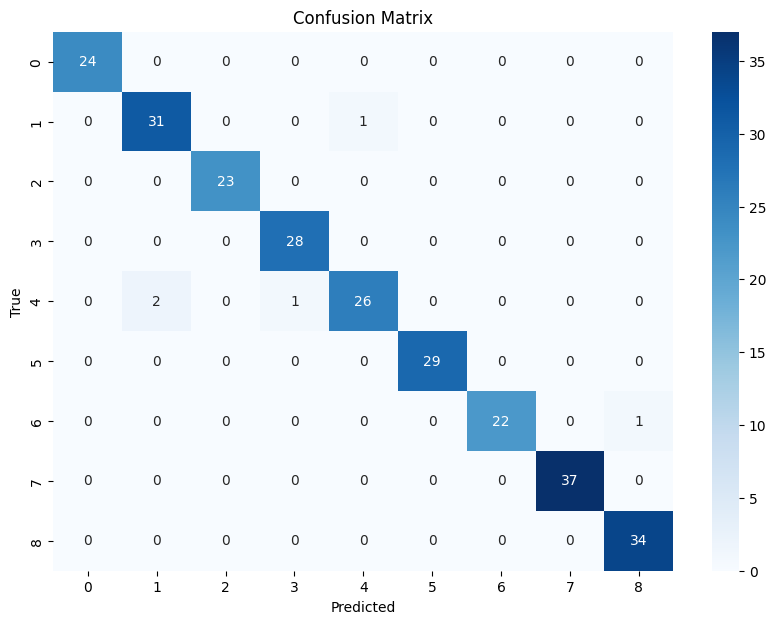

In [18]:
#split into train/test
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)

#train random forest classifier
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
rf = RandomForestClassifier(n_estimators=20, max_depth=7, random_state=42)
rf.fit(X_train, y_train)

#test on the test data
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]
y_pred = rf.predict(X_test)

#accuracy
acc_offline = np.mean(y_pred == y_test)
print(acc_offline)
print(len(df_train))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

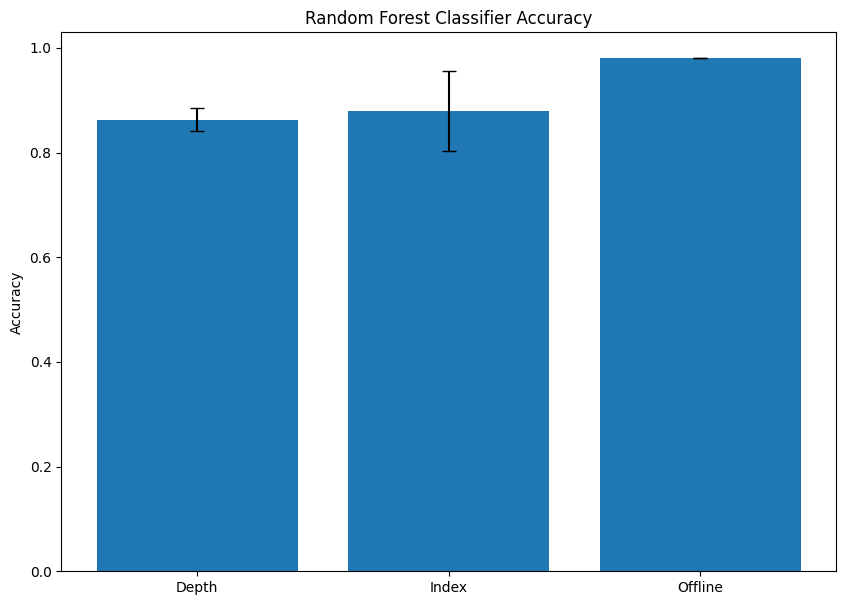

In [19]:
mean_acc_depth = np.mean(accs_depth)
std_acc_depth = np.std(accs_depth)

mean_acc_index = np.mean(accs_index)
std_acc_index = np.std(accs_index)

#plot these, together with the offline accuracy as a bar chart
plt.figure(figsize=(10, 7))
plt.bar(['Depth', 'Index', 'Offline'], [mean_acc_depth, mean_acc_index, acc_offline], yerr=[std_acc_depth, std_acc_index, 0], capsize=5)
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.show()


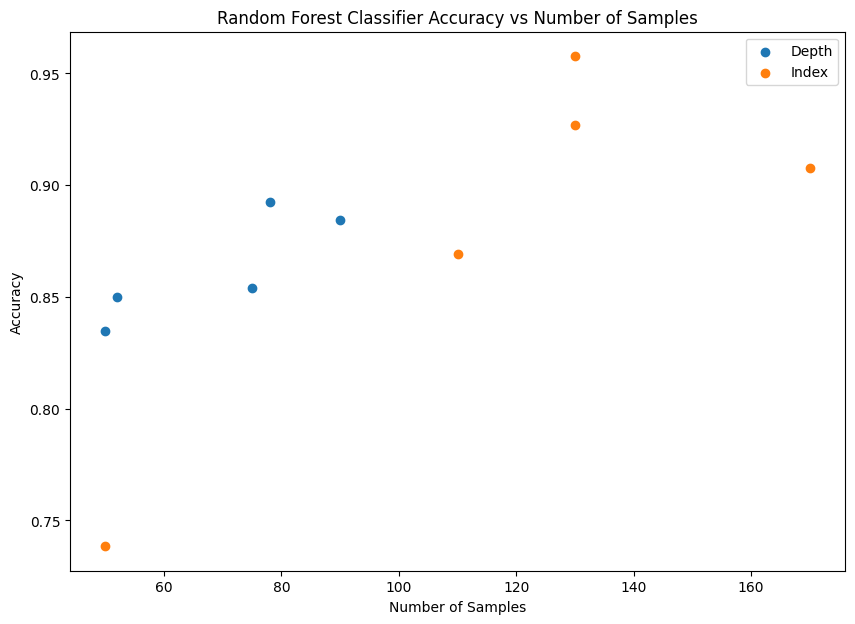

In [20]:
#plot accs_depth versus nums_depth, and accs_index versus nums_index
plt.figure(figsize=(10, 7))
plt.scatter(nums_depth, accs_depth, label='Depth')
plt.scatter(nums_index, accs_index, label='Index')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy vs Number of Samples')
plt.legend()
plt.show()